## Importações

In [1]:
from funcoes.funcoes import *

In [2]:
dados_WoE_VI = pd.read_csv('dados/clean_data.zip', low_memory = False)

In [3]:
dados_WoE_VI.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,...,0,0,0,0,0,0,0,0,1,0
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,...,0,0,0,0,0,0,0,0,1,0
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,...,0,0,0,0,0,0,0,0,1,0
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,...,0,0,0,0,0,0,0,0,1,0
4,3000,3000,3000.0,60,12.69,67.79,B,1,RENT,80000.0,...,0,0,0,0,0,0,0,0,1,0


----

## 1. Weight of evidence (WoE)

Na avaliação de cenários com respostas binárias, típicos em situações de concessão de crédito, utiliza-se a métrica conhecida como Peso de Evidência (WoE, *Weight of Evidence*) para quantificar a extensão na qual uma variável independente é capaz de prever o comportamento de uma variável dependente. Essa medida é particularmente útil para avaliar o nível de incerteza associado à previsão de eventos. Dessa forma, o WoE serve como ferramenta para agrupar categorias que apresentam valores de evidência ponderada similares, otimizando a análise e a interpretação de dados em modelos preditivos.

Calculada por:

<br>

\begin{align}
\text{WoE:} \qquad &\ln \left( \frac{\text{% Bons}_i}{\text{% Ruins}_i} \right)   \\[10pt]
\end{align}

<br>

---

## 2. Information value (IV)

Já o valor da informação (*Information Value* - IV),  que mede a força da relação entre a variável dependente e a independente, irá ajudar a selecionar as variáveis úteis para o modelo de Regressão Logística.

O valor da informação é calculado por:

<br>

\begin{align}
\text{IV:} \qquad &\sum_{i=1}^n \left( \text{% Bons}_i - \text{% Ruins}_i \right) \cdot \ln \left( \frac{\text{% Bons}_i}{\text{% Ruins}_i} \right)
\end{align}

<br><br>

A tabela abaixo mostra a relação entre IV e poder preditivo de uma variável:

<br>

Valor da Informação|Força Preditiva
-------------------|---------------
< 0.02             | Insignificante
0.02 - 0.1         | Fraca         
0.1 - 0.3          | Média         
0.3 - 0.5          | Forte         
> 0.5              | Superforte  


<br>

Considerando a tabela abaixo e a força predivita das variáveis, serão selecionadas apenas as que tiverem valor de informação maior que 0.02 e menores que 0.5.

---

## 3. Coarse classing e fine classing 

Coarse classing: Refere-se ao processo de agrupar ou categorizar variáveis contínuas ou numéricas em um número relativamente pequeno de categorias ou "classes". Isso é feito para simplificar a análise, reduzir a variabilidade, lidar com outliers ou facilitar a interpretação dos dados. Por exemplo, a idade pode ser transformada de uma variável contínua para categorias como "Jovem", "Meia-idade" e "Idoso". O coarse classing é útil quando a relação entre a variável independente e a variável dependente não é linear ou quando se deseja simplificar modelos complexos.

Fine classing: envolve a criação de um número maior de categorias ou classes para uma variável, permitindo uma diferenciação mais detalhada e granular. Isso pode ser útil em situações onde nuances nas variáveis independentes têm impactos significativos na variável dependente. Por exemplo, em vez de usar as categorias de idade "Jovem", "Meia-idade" e "Idoso", o fine classing poderia detalhar em faixas etárias específicas como "18-24", "25-34", "35-44", e assim por diante. Isso permite capturar mais precisamente os efeitos que diferentes faixas etárias podem ter sobre a variável de interesse.

A seguir, serão realizadas modificações nas variáveis utilizando esses dois processos.

In [4]:
# separando dados

df_inputs  = dados_WoE_VI.drop(columns = ['target'], axis = 1)
df_targets = dados_WoE_VI['target']

`home_ownership`

In [5]:
df_temp = woe_categorica(df_inputs, 'home_ownership', df_targets)
df_temp

,home_ownership,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN,inf
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001,inf
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636,inf
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744,inf
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf,inf


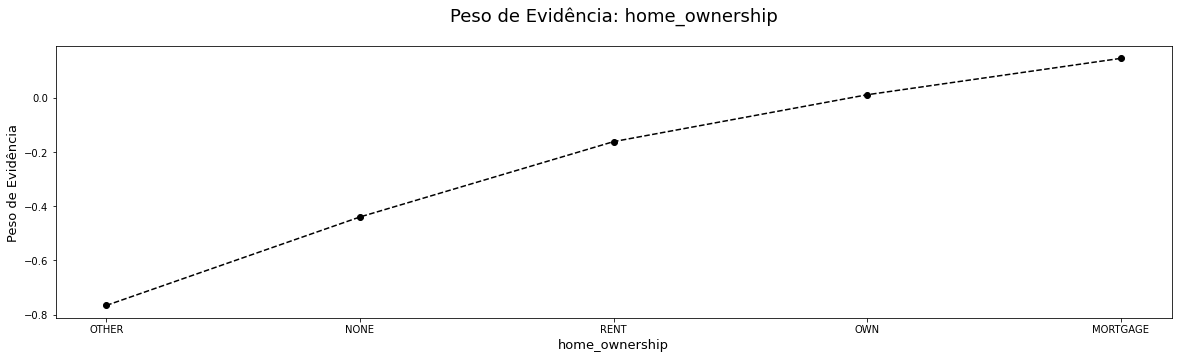

In [6]:
plot_woe(df_temp)

In [7]:
# criação da nova variável

df_inputs['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs['home_ownership:RENT'], df_inputs['home_ownership:OTHER'],
                                                       df_inputs['home_ownership:NONE'], df_inputs['home_ownership:ANY']])

`addr_state`

In [8]:
df_temp = woe_categorica(df_inputs, 'addr_state', df_targets)
df_temp

,addr_state,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,NE,14,0.428571,0.000030,6.0,8.0,0.000014,0.000157,-2.385526,NaN,NaN,inf
1,IA,14,0.785714,0.000030,11.0,3.0,0.000026,0.000059,-0.798561,3.571429e-01,1.586965,inf
2,NV,6519,0.862862,0.013981,5625.0,894.0,0.013544,0.017540,-0.258574,7.714812e-02,0.539987,inf
3,HI,2487,0.873743,0.005334,2173.0,314.0,0.005232,0.006161,-0.163373,1.088106e-02,0.095201,inf
4,FL,31637,0.874640,0.067849,27671.0,3966.0,0.066626,0.077814,-0.155217,8.969866e-04,0.008156,inf
5,AL,5853,0.876474,0.012552,5130.0,723.0,0.012352,0.014185,-0.138392,1.833151e-03,0.016825,inf
6,NY,40242,0.883182,0.086303,35541.0,4701.0,0.085576,0.092234,-0.074932,6.708147e-03,0.063460,inf
7,LA,5489,0.883403,0.011772,4849.0,640.0,0.011675,0.012557,-0.072784,2.214196e-04,0.002148,inf
8,NM,2588,0.884467,0.005550,2289.0,299.0,0.005511,0.005866,-0.062417,1.063600e-03,0.010367,inf
9,OK,4117,0.884625,0.008829,3642.0,475.0,0.008769,0.009320,-0.060871,1.579570e-04,0.001547,inf


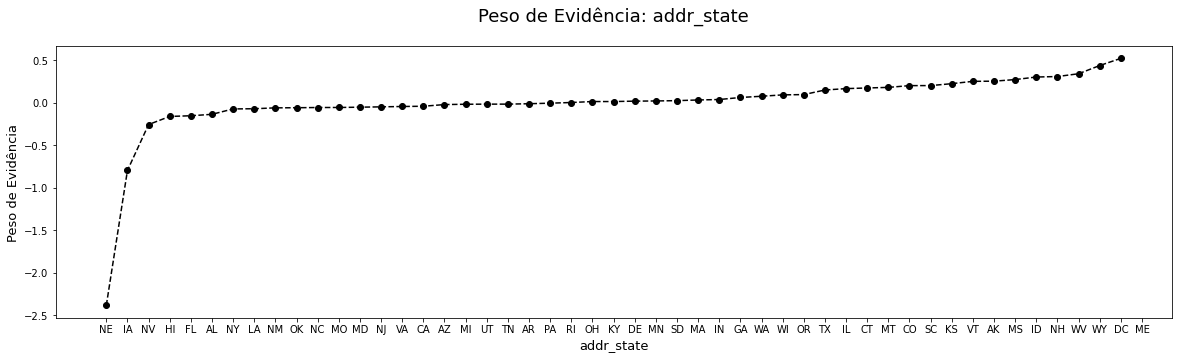

In [9]:
plot_woe(df_temp)

In [10]:
df_inputs['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs['addr_state:NE'],df_inputs['addr_state:IA'], df_inputs['addr_state:NV'],df_inputs['addr_state:FL'], df_inputs['addr_state:HI'], df_inputs['addr_state:AL']])
df_inputs['addr_state:NM_VA'] = sum([df_inputs['addr_state:NM'], df_inputs['addr_state:VA']])
df_inputs['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs['addr_state:OK'], df_inputs['addr_state:TN'], df_inputs['addr_state:MO'], df_inputs['addr_state:LA'], df_inputs['addr_state:MD'], df_inputs['addr_state:NC']])
df_inputs['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs['addr_state:UT'], df_inputs['addr_state:KY'], df_inputs['addr_state:AZ'], df_inputs['addr_state:NJ']])
df_inputs['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs['addr_state:AR'], df_inputs['addr_state:MI'], df_inputs['addr_state:PA'], df_inputs['addr_state:OH'], df_inputs['addr_state:MN']])
df_inputs['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs['addr_state:RI'], df_inputs['addr_state:MA'], df_inputs['addr_state:DE'], df_inputs['addr_state:SD'], df_inputs['addr_state:IN']])
df_inputs['addr_state:GA_WA_OR'] = sum([df_inputs['addr_state:GA'], df_inputs['addr_state:WA'], df_inputs['addr_state:OR']])
df_inputs['addr_state:WI_MT'] = sum([df_inputs['addr_state:WI'], df_inputs['addr_state:MT']])
df_inputs['addr_state:IL_CT'] = sum([df_inputs['addr_state:IL'], df_inputs['addr_state:CT']])
df_inputs['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs['addr_state:KS'], df_inputs['addr_state:SC'], df_inputs['addr_state:CO'], df_inputs['addr_state:VT'], df_inputs['addr_state:AK'], df_inputs['addr_state:MS']])
df_inputs['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs['addr_state:WV'], df_inputs['addr_state:NH'], df_inputs['addr_state:WY'], df_inputs['addr_state:DC'], df_inputs['addr_state:ME'], df_inputs['addr_state:ID']])

`verification_status`

In [11]:
df_temp = woe_categorica(df_inputs, 'verification_status', df_targets)
df_temp

,verification_status,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,Verified,168055,0.872631,0.360413,146650.0,21405.0,0.353104,0.419969,-0.173420,NaN,NaN,0.020831
1,Source Verified,149993,0.895882,0.321677,134376.0,15617.0,0.323550,0.306408,0.054438,0.023251,0.227858,0.020831
2,Not Verified,148237,0.905921,0.317911,134291.0,13946.0,0.323346,0.273623,0.166972,0.010039,0.112535,0.020831


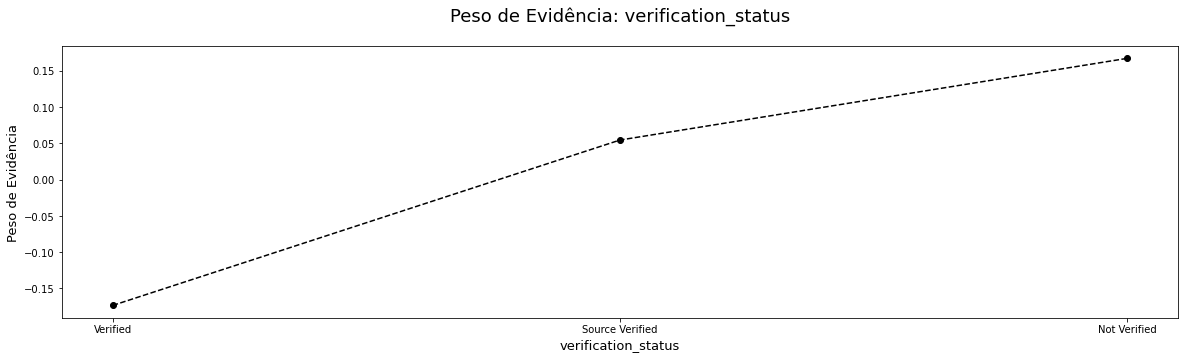

In [12]:
plot_woe(df_temp)

`purpose` 

In [13]:
df_temp = woe_categorica(df_inputs, 'purpose', df_targets)
df_temp

,purpose,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN,0.03698
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151,0.03698
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944,0.03698
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306,0.03698
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992,0.03698
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034,0.03698
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217,0.03698
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704,0.03698
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308,0.03698
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060,0.03698


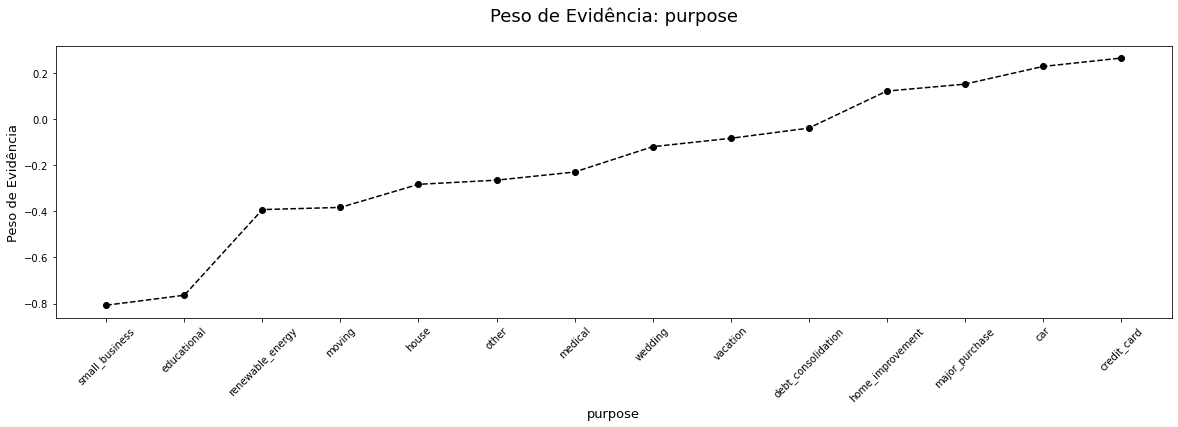

In [14]:
plot_woe(df_temp, 45)

In [15]:
df_inputs['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs['purpose:educational'], df_inputs['purpose:small_business'], df_inputs['purpose:wedding'], df_inputs['purpose:renewable_energy'], df_inputs['purpose:moving'], df_inputs['purpose:house']])
df_inputs['purpose:oth__med__vacation'] = sum([df_inputs['purpose:other'], df_inputs['purpose:medical'], df_inputs['purpose:vacation']])
df_inputs['purpose:major_purch__car__home_impr'] = sum([df_inputs['purpose:major_purchase'], df_inputs['purpose:car'], df_inputs['purpose:home_improvement']])

`initial_list_status`

In [16]:
df_temp = woe_categorica(df_inputs, 'initial_list_status', df_targets)
df_temp

,initial_list_status,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,f,303005,0.879692,0.649828,266551.0,36454.0,0.641801,0.715233,-0.108330,NaN,NaN,0.024801
1,w,163280,0.911110,0.350172,148766.0,14514.0,0.358199,0.284767,0.229417,0.031418,0.337746,0.024801


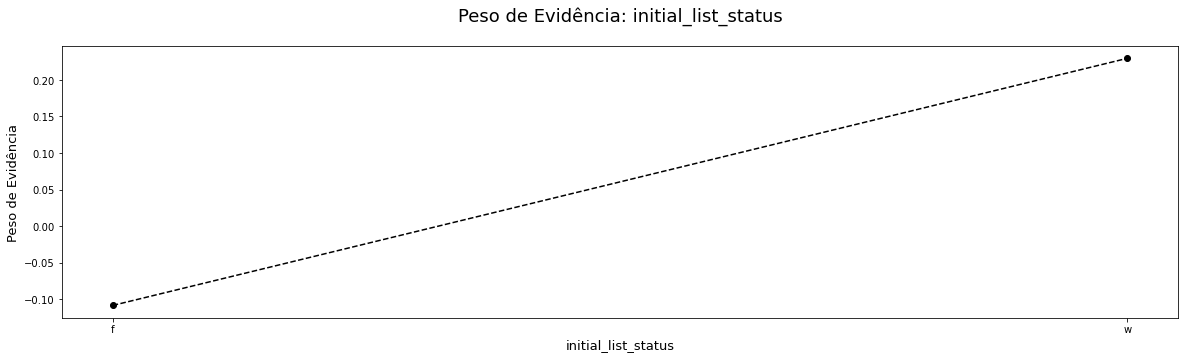

In [17]:
plot_woe(df_temp)

`grade`

In [18]:
df_temp = woe_categorica(df_inputs, 'grade', df_targets)
df_temp

,grade,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.290782
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.290782
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.290782
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.290782
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.290782
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.290782
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.290782


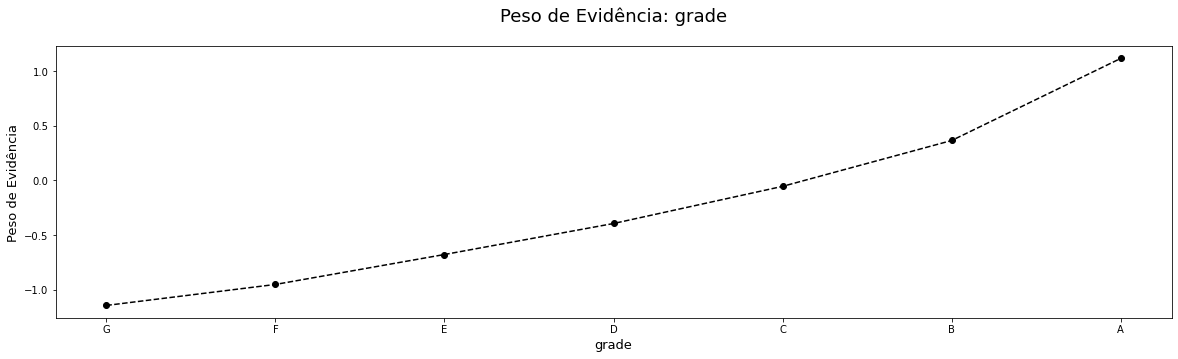

In [19]:
plot_woe(df_temp)

`term`

In [20]:
df_temp = woe_continua(df_inputs, 'term', df_targets)
df_temp

,term,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,36,337953,0.902915,0.724778,305143.0,32810.0,0.734723,0.643737,0.132203,NaN,NaN,0.03886
1,60,128332,0.858508,0.275222,110174.0,18158.0,0.265277,0.356263,-0.294894,0.044408,0.427097,0.03886


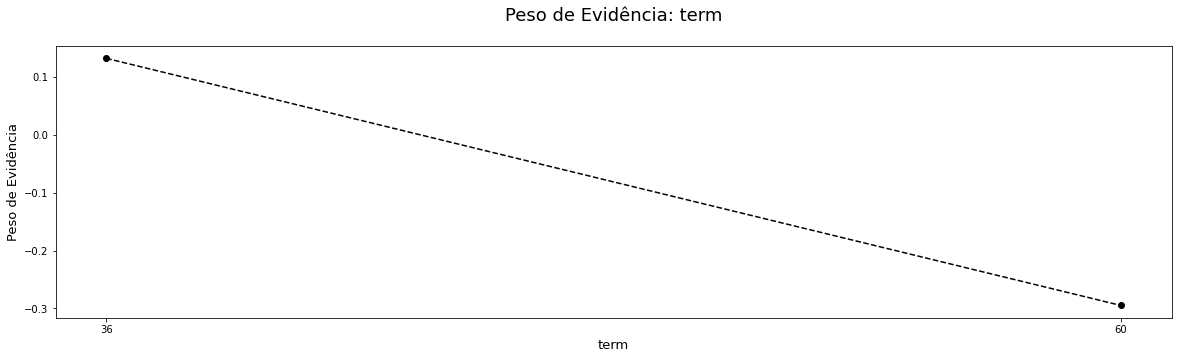

In [21]:
plot_woe(df_temp)

In [22]:
# criando dummies da variável term

df_inputs['term:36'] = np.where((df_inputs['term'] == 36), 1, 0)
df_inputs['term:60'] = np.where((df_inputs['term'] == 60), 1, 0)

`emp_length_int` 

In [23]:
df_temp = woe_continua(df_inputs, 'emp_length', df_targets)
df_temp

,emp_length,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,0,57273,0.876015,0.122828,50172.0,7101.0,0.120804,0.139323,-0.142623,NaN,NaN,0.006611
1,1,29622,0.888124,0.063528,26308.0,3314.0,0.063344,0.065021,-0.026127,0.012109,0.116496,0.006611
2,2,41373,0.890242,0.088729,36832.0,4541.0,0.088684,0.089095,-0.004624,0.002119,0.021503,0.006611
3,3,36596,0.890480,0.078484,32588.0,4008.0,0.078465,0.078638,-0.002192,0.000237,0.002432,0.006611
4,4,28023,0.890411,0.060098,24952.0,3071.0,0.060079,0.060253,-0.002893,0.000068,0.000701,0.006611
5,5,30774,0.885033,0.065998,27236.0,3538.0,0.065579,0.069416,-0.056866,0.005379,0.053973,0.006611
6,6,26112,0.882889,0.056000,23054.0,3058.0,0.055509,0.059998,-0.077766,0.002144,0.020900,0.006611
7,7,26180,0.888655,0.056146,23265.0,2915.0,0.056017,0.057193,-0.020764,0.005766,0.057002,0.006611
8,8,22395,0.889931,0.048029,19930.0,2465.0,0.047987,0.048364,-0.007810,0.001275,0.012954,0.006611
9,9,17888,0.887914,0.038363,15883.0,2005.0,0.038243,0.039338,-0.028239,0.002017,0.020429,0.006611


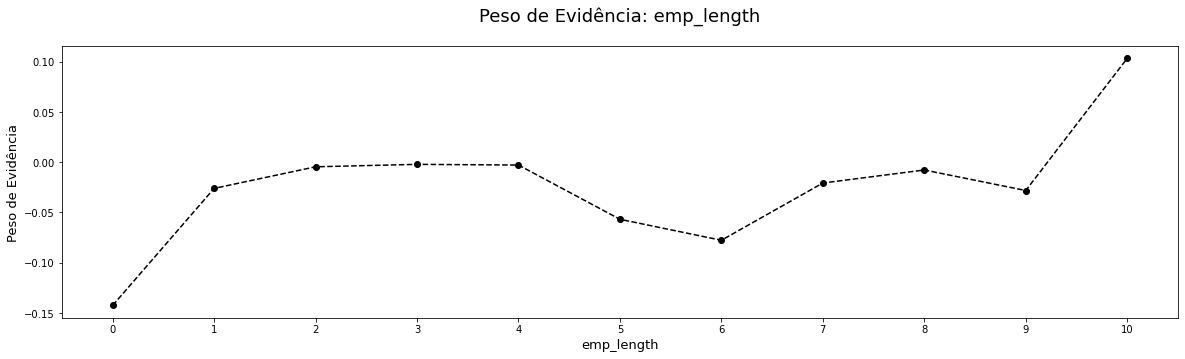

In [24]:
plot_woe(df_temp)

In [25]:
df_inputs['emp_length:0'] = np.where(df_inputs['emp_length'].isin([0]), 1, 0)
df_inputs['emp_length:1'] = np.where(df_inputs['emp_length'].isin([1]), 1, 0)
df_inputs['emp_length:2-4'] = np.where(df_inputs['emp_length'].isin(range(2, 5)), 1, 0)
df_inputs['emp_length:5-6'] = np.where(df_inputs['emp_length'].isin(range(5, 7)), 1, 0)
df_inputs['emp_length:7-9'] = np.where(df_inputs['emp_length'].isin(range(7, 10)), 1, 0)
df_inputs['emp_length:10']  = np.where(df_inputs['emp_length'].isin([10]), 1, 0)

`mths_since_issue_d` 

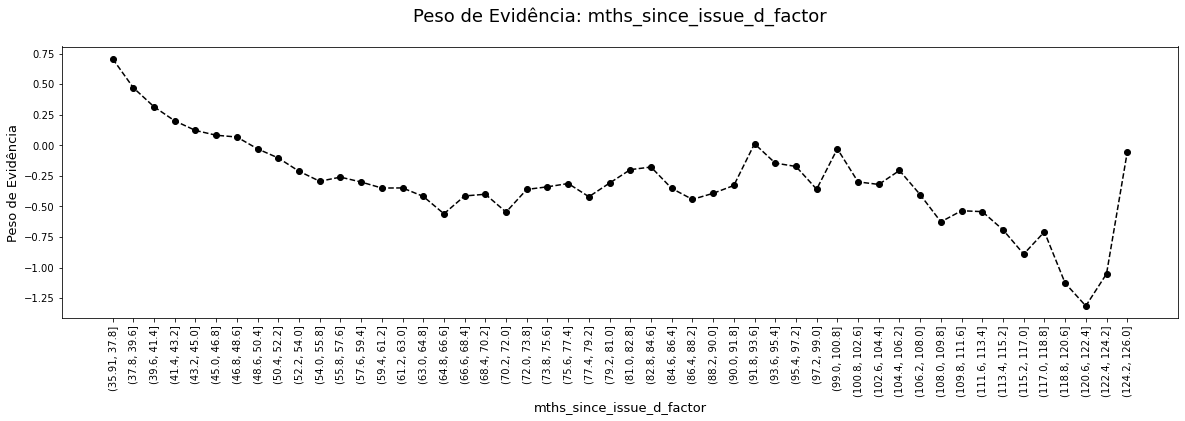

In [26]:
df_inputs['mths_since_issue_d_factor'] = pd.cut(df_inputs['mths_since_issue_d'], 50)
plot_woe(woe_continua(df_inputs,'mths_since_issue_d_factor', df_targets[df_inputs.index]), 90)

In [27]:
df_inputs['mths_since_issue_d:<38'] = np.where(df_inputs['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs['mths_since_issue_d:38-39'] = np.where(df_inputs['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs['mths_since_issue_d:40-41'] = np.where(df_inputs['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs['mths_since_issue_d:42-48'] = np.where(df_inputs['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs['mths_since_issue_d:49-52'] = np.where(df_inputs['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs['mths_since_issue_d:53-64'] = np.where(df_inputs['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs['mths_since_issue_d:65-84'] = np.where(df_inputs['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs['mths_since_issue_d:>84'] = np.where(df_inputs['mths_since_issue_d'].isin(range(85, int(df_inputs['mths_since_issue_d'].max()))), 1, 0)

`int_rate` 

In [28]:
df_inputs['int_rate_factor'] = pd.cut(df_inputs['int_rate'], 50)

df_temp = woe_continua(df_inputs, 'int_rate_factor', df_targets)
df_temp

,int_rate_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(5.399, 5.833]",983,0.963377,0.002108,947.0,36.0,0.002280,0.000706,1.171936,NaN,NaN,0.347385
1,"(5.833, 6.246]",10545,0.980275,0.022615,10337.0,208.0,0.024889,0.004081,1.808103,0.016898,0.636167,0.347385
2,"(6.246, 6.658]",9800,0.971633,0.021017,9522.0,278.0,0.022927,0.005454,1.435895,0.008642,0.372208,0.347385
3,"(6.658, 7.071]",2293,0.968600,0.004918,2221.0,72.0,0.005348,0.001413,1.331203,0.003033,0.104692,0.347385
4,"(7.071, 7.484]",3947,0.977451,0.008465,3858.0,89.0,0.009289,0.001746,1.671424,0.008851,0.340221,0.347385
5,"(7.484, 7.897]",15826,0.962972,0.033941,15240.0,586.0,0.036695,0.011497,1.160515,0.014479,0.510909,0.347385
6,"(7.897, 8.31]",12116,0.949653,0.025984,11506.0,610.0,0.027704,0.011968,0.839321,0.013319,0.321194,0.347385
7,"(8.31, 8.722]",8274,0.965313,0.017745,7987.0,287.0,0.019231,0.005631,1.228244,0.015660,0.388923,0.347385
8,"(8.722, 9.135]",11923,0.938354,0.025570,11188.0,735.0,0.026938,0.014421,0.624882,0.026959,0.603362,0.347385
9,"(9.135, 9.548]",8271,0.966389,0.017738,7993.0,278.0,0.019246,0.005454,1.260856,0.028034,0.635974,0.347385


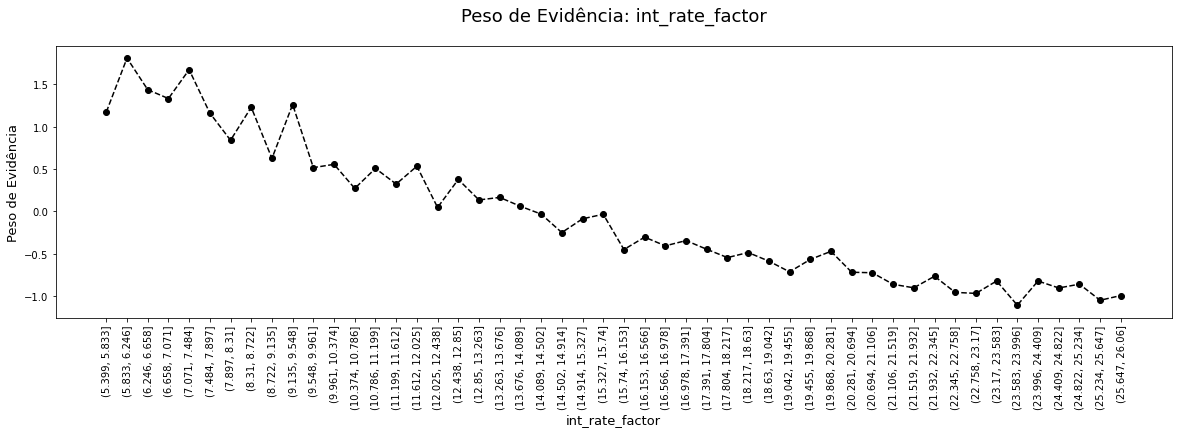

In [29]:
plot_woe(df_temp, 90)

In [30]:
df_inputs['int_rate:<9.548'] = np.where((df_inputs['int_rate'] <= 9.548), 1, 0)
df_inputs['int_rate:9.548-12.025'] = np.where((df_inputs['int_rate'] > 9.548) & (df_inputs['int_rate'] <= 12.025), 1, 0)
df_inputs['int_rate:12.025-15.74'] = np.where((df_inputs['int_rate'] > 12.025) & (df_inputs['int_rate'] <= 15.74), 1, 0)
df_inputs['int_rate:15.74-20.281'] = np.where((df_inputs['int_rate'] > 15.74) & (df_inputs['int_rate'] <= 20.281), 1, 0)
df_inputs['int_rate:>20.281'] = np.where((df_inputs['int_rate'] > 20.281), 1, 0)

`funded_amnt`

In [31]:
df_inputs['funded_amnt_factor'] = pd.cut(df_inputs['funded_amnt'], 50)

df_temp = woe_continua(df_inputs, 'funded_amnt_factor', df_targets)
df_temp

,funded_amnt_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(465.5, 1190.0]",1543,0.900194,0.003309,1389.0,154.0,0.003344,0.003022,0.101543,NaN,NaN,0.014153
1,"(1190.0, 1880.0]",3828,0.902299,0.008210,3454.0,374.0,0.008317,0.007338,0.125188,0.002104,0.023646,0.014153
2,"(1880.0, 2570.0]",7531,0.895100,0.016151,6741.0,790.0,0.016231,0.015500,0.046087,0.007199,0.079102,0.014153
3,"(2570.0, 3260.0]",9065,0.890017,0.019441,8068.0,997.0,0.019426,0.019561,-0.006934,0.005084,0.053020,0.014153
4,"(3260.0, 3950.0]",5996,0.891594,0.012859,5346.0,650.0,0.012872,0.012753,0.009287,0.001578,0.016221,0.014153
5,"(3950.0, 4640.0]",11321,0.889321,0.024279,10068.0,1253.0,0.024242,0.024584,-0.014023,0.002274,0.023310,0.014153
6,"(4640.0, 5330.0]",19860,0.893353,0.042592,17742.0,2118.0,0.042719,0.041555,0.027618,0.004033,0.041641,0.014153
7,"(5330.0, 6020.0]",21422,0.906171,0.045942,19412.0,2010.0,0.046740,0.039437,0.169913,0.012818,0.142294,0.014153
8,"(6020.0, 6710.0]",8632,0.886469,0.018512,7652.0,980.0,0.018424,0.019228,-0.042674,0.019702,0.212587,0.014153
9,"(6710.0, 7400.0]",14686,0.897113,0.031496,13175.0,1511.0,0.031723,0.029646,0.067705,0.010644,0.110380,0.014153


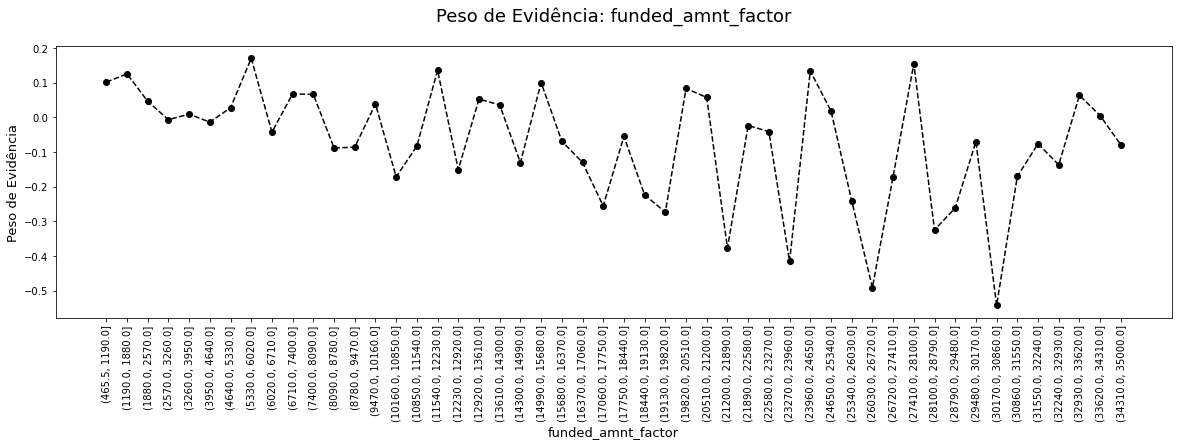

In [32]:
plot_woe(df_temp, 90)

`mths_since_earliest_cr_line`

In [33]:
df_inputs['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs['mths_since_earliest_cr_line'], 50)

df_temp = woe_continua(df_inputs, 'mths_since_earliest_cr_line_factor', df_targets)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(72.486, 83.28]",1065,0.905164,0.002284,964.0,101.0,0.002321,0.001982,0.158127,NaN,NaN,0.016285
1,"(83.28, 93.56]",2276,0.889279,0.004881,2024.0,252.0,0.004873,0.004944,-0.014442,0.015885,0.172569,0.016285
2,"(93.56, 103.84]",2972,0.857672,0.006374,2549.0,423.0,0.006137,0.008299,-0.301760,0.031608,0.287318,0.016285
3,"(103.84, 114.12]",4969,0.869591,0.010657,4321.0,648.0,0.010404,0.012714,-0.200493,0.011920,0.101267,0.016285
4,"(114.12, 124.4]",8393,0.865841,0.018000,7267.0,1126.0,0.017497,0.022092,-0.233172,0.003751,0.032679,0.016285
5,"(124.4, 134.68]",11090,0.860234,0.023784,9540.0,1550.0,0.022970,0.030411,-0.280606,0.005606,0.047433,0.016285
6,"(134.68, 144.96]",13533,0.871278,0.029023,11791.0,1742.0,0.028390,0.034178,-0.185541,0.011043,0.095064,0.016285
7,"(144.96, 155.24]",15851,0.878052,0.033994,13918.0,1933.0,0.033512,0.037926,-0.123734,0.006774,0.061807,0.016285
8,"(155.24, 165.52]",18041,0.881603,0.038691,15905.0,2136.0,0.038296,0.041909,-0.090145,0.003551,0.033589,0.016285
9,"(165.52, 175.8]",20687,0.885097,0.044366,18310.0,2377.0,0.044087,0.046637,-0.056236,0.003494,0.033910,0.016285


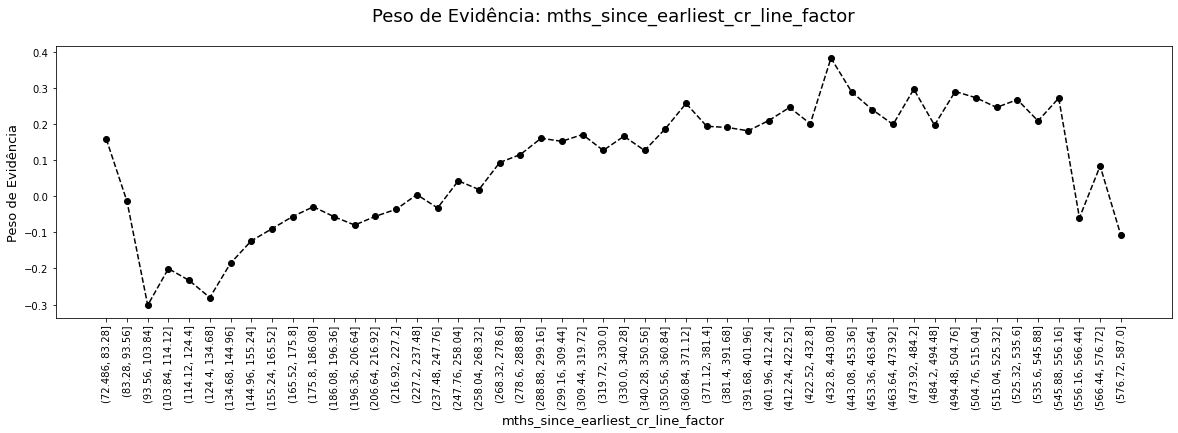

In [34]:
plot_woe(df_temp, 90)

In [35]:
df_inputs['mths_since_earliest_cr_line:<140'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs['mths_since_earliest_cr_line:>352'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs['mths_since_earliest_cr_line'].max()))), 1, 0)

`delinq_2yrs`

In [36]:
df_temp = woe_continua(df_inputs, 'delinq_2yrs', df_targets)
df_temp

,delinq_2yrs,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,0.0,382954,0.890587,0.821338,341054.0,41900.0,0.821241,0.822133,-0.001085,NaN,NaN,inf
1,1.0,56224,0.892679,0.120586,50190.0,6034.0,0.120855,0.118395,0.020565,0.002092,0.021651,inf
2,2.0,16310,0.888228,0.034981,14487.0,1823.0,0.034884,0.035770,-0.025072,0.004451,0.045637,inf
3,3.0,5684,0.885292,0.012191,5032.0,652.0,0.012117,0.012793,-0.054312,0.002936,0.029240,inf
4,4.0,2378,0.896131,0.005100,2131.0,247.0,0.005131,0.004846,0.057118,0.010839,0.111430,inf
5,5.0,1236,0.888350,0.002651,1098.0,138.0,0.002644,0.002708,-0.023848,0.007782,0.080966,inf
6,6.0,629,0.893482,0.001349,562.0,67.0,0.001353,0.001315,0.028969,0.005132,0.052817,inf
7,7.0,346,0.872832,0.000742,302.0,44.0,0.000727,0.000863,-0.171603,0.020649,0.200572,inf
8,8.0,177,0.903955,0.000380,160.0,17.0,0.000385,0.000334,0.144120,0.031122,0.315723,inf
9,9.0,111,0.900901,0.000238,100.0,11.0,0.000241,0.000216,0.109435,0.003054,0.034686,inf


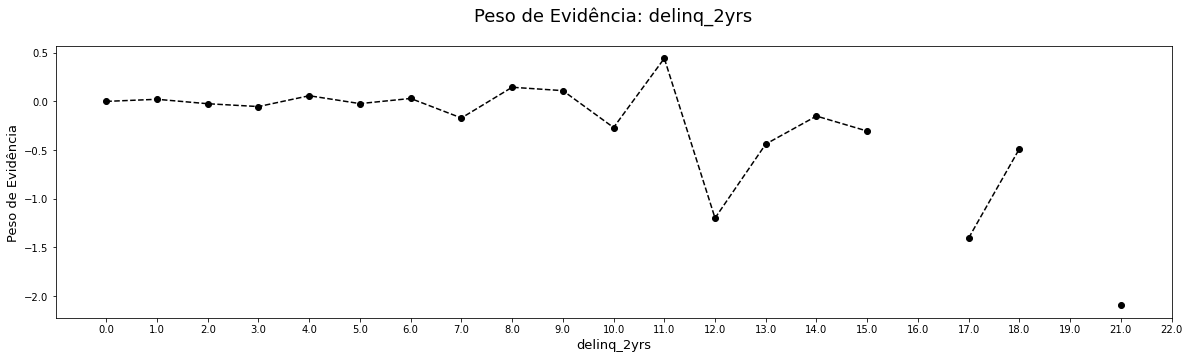

In [37]:
plot_woe(df_temp)

In [38]:
df_inputs['delinq_2yrs:0'] = np.where((df_inputs['delinq_2yrs'] == 0), 1, 0)
df_inputs['delinq_2yrs:1-3'] = np.where((df_inputs['delinq_2yrs'] >= 1) & (df_inputs['delinq_2yrs'] <= 3), 1, 0)
df_inputs['delinq_2yrs:>=4'] = np.where((df_inputs['delinq_2yrs'] >= 9), 1, 0)

`inq_last_6mths`

In [39]:
df_temp = woe_continua(df_inputs, 'inq_last_6mths', df_targets)
df_temp

,inq_last_6mths,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,0.0,241498,0.908736,0.517952,219458.0,22040.0,0.528444,0.432454,0.200462,NaN,NaN,inf
1,1.0,130148,0.884439,0.279134,115108.0,15040.0,0.277174,0.295104,-0.062683,0.024297,0.263144,inf
2,2.0,57825,0.863606,0.124020,49938.0,7887.0,0.120248,0.154753,-0.252274,0.020834,0.189591,inf
3,3.0,25126,0.841001,0.053889,21131.0,3995.0,0.050882,0.078387,-0.432143,0.022604,0.179869,inf
4,4.0,7241,0.846982,0.015530,6133.0,1108.0,0.014768,0.021740,-0.386713,0.005981,0.045430,inf
5,5.0,2768,0.828396,0.005937,2293.0,475.0,0.005521,0.009320,-0.523539,0.018587,0.136826,inf
6,6.0,1188,0.783670,0.002548,931.0,257.0,0.002242,0.005043,-0.810657,0.044726,0.287118,inf
7,7.0,195,0.651282,0.000418,127.0,68.0,0.000306,0.001334,-1.473161,0.132388,0.662504,inf
8,8.0,122,0.622951,0.000262,76.0,46.0,0.000183,0.000903,-1.595748,0.028331,0.122587,inf
9,9.0,50,0.640000,0.000107,32.0,18.0,0.000077,0.000353,-1.522476,0.017049,0.073272,inf


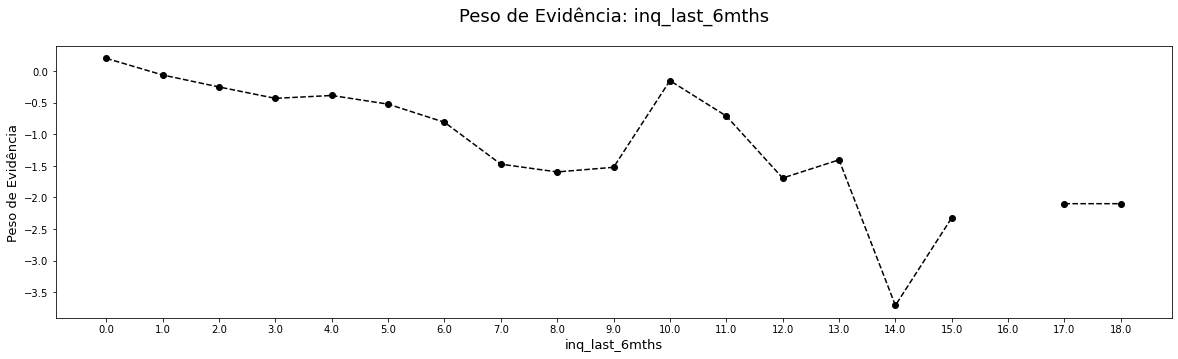

In [40]:
plot_woe(df_temp)

In [41]:
df_inputs['inq_last_6mths:0'] = np.where((df_inputs['inq_last_6mths'] == 0), 1, 0)
df_inputs['inq_last_6mths:1-2'] = np.where((df_inputs['inq_last_6mths'] >= 1) & (df_inputs['inq_last_6mths'] <= 2), 1, 0)
df_inputs['inq_last_6mths:3-6'] = np.where((df_inputs['inq_last_6mths'] >= 3) & (df_inputs['inq_last_6mths'] <= 6), 1, 0)
df_inputs['inq_last_6mths:>6'] = np.where((df_inputs['inq_last_6mths'] > 6), 1, 0)

`open_acc`

In [42]:
df_temp = woe_continua(df_inputs, 'open_acc', df_targets)
df_temp

,open_acc,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,0.0,7,0.428571,0.000015,3.0,4.0,0.000007,0.000078,-2.385522,NaN,NaN,inf
1,1.0,142,0.873239,0.000305,124.0,18.0,0.000299,0.000353,-0.167931,0.444668,2.217592,inf
2,2.0,1790,0.844134,0.003839,1511.0,279.0,0.003638,0.005474,-0.408525,0.029105,0.240595,inf
3,3.0,5500,0.869455,0.011796,4782.0,718.0,0.011515,0.014088,-0.201696,0.025320,0.206829,inf
4,4.0,12588,0.891643,0.026998,11224.0,1364.0,0.027027,0.026763,0.009792,0.022188,0.211488,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
57,61.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
58,62.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
59,75.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
60,76.0,2,0.000000,0.000004,0.0,2.0,0.000000,0.000039,-inf,1.000000,inf,inf


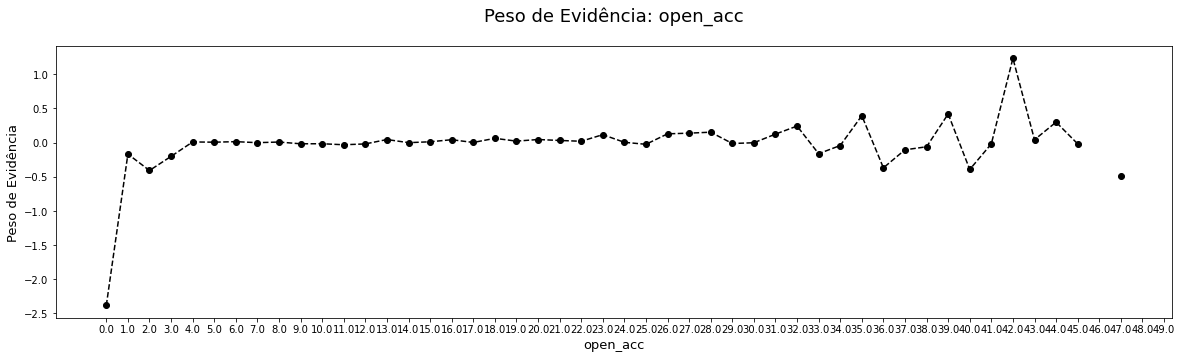

In [43]:
plot_woe(df_temp)

In [44]:
df_inputs['open_acc:0'] = np.where((df_inputs['open_acc'] == 0), 1, 0)
df_inputs['open_acc:1-3'] = np.where((df_inputs['open_acc'] >= 1) & (df_inputs['open_acc'] <= 3), 1, 0)
df_inputs['open_acc:4-12']  = np.where((df_inputs['open_acc'] >= 4) & (df_inputs['open_acc'] <= 12), 1, 0)
df_inputs['open_acc:13-17'] = np.where((df_inputs['open_acc'] >= 13) & (df_inputs['open_acc'] <= 17), 1, 0)
df_inputs['open_acc:18-22'] = np.where((df_inputs['open_acc'] >= 18) & (df_inputs['open_acc'] <= 22), 1, 0)
df_inputs['open_acc:23-25'] = np.where((df_inputs['open_acc'] >= 23) & (df_inputs['open_acc'] <= 25), 1, 0)
df_inputs['open_acc:26-30'] = np.where((df_inputs['open_acc'] >= 26) & (df_inputs['open_acc'] <= 30), 1, 0)
df_inputs['open_acc:>=31']  = np.where((df_inputs['open_acc'] >= 31), 1, 0)

`pub_rec`

In [45]:
df_temp = woe_continua(df_inputs, 'pub_rec', df_targets)
df_temp

,pub_rec,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,0.0,404893,0.889788,0.868392,360269.0,44624.0,0.867510,0.875581,-0.009261,NaN,NaN,inf
1,1.0,53051,0.894969,0.113781,47479.0,5572.0,0.114327,0.109330,0.044693,0.005181,0.053954,inf
2,2.0,5624,0.903450,0.012062,5081.0,543.0,0.012235,0.010654,0.138314,0.008481,0.093621,inf
3,3.0,1611,0.916201,0.003455,1476.0,135.0,0.003554,0.002649,0.293976,0.012752,0.155662,inf
4,4.0,520,0.909615,0.001115,473.0,47.0,0.001139,0.000922,0.211107,0.006586,0.082868,inf
5,5.0,276,0.909420,0.000592,251.0,25.0,0.000604,0.000491,0.208737,0.000195,0.002371,inf
6,6.0,136,0.926471,0.000292,126.0,10.0,0.000303,0.000196,0.435856,0.017050,0.227120,inf
7,7.0,62,0.919355,0.000133,57.0,5.0,0.000137,0.000098,0.335773,0.007116,0.100083,inf
8,8.0,29,0.965517,0.000062,28.0,1.0,0.000067,0.000020,1.234364,0.046162,0.898591,inf
9,9.0,16,0.812500,0.000034,13.0,3.0,0.000031,0.000059,-0.631503,0.153017,1.865867,inf


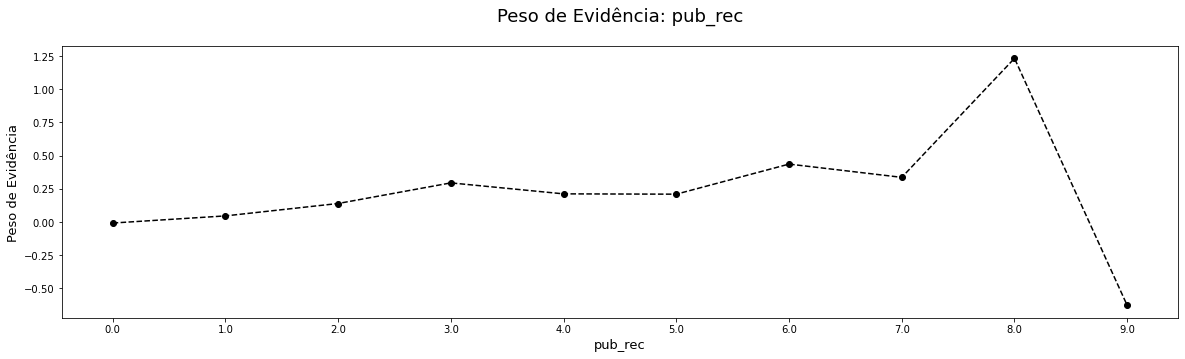

In [46]:
plot_woe(df_temp)

In [47]:
df_inputs['pub_rec:0-2'] = np.where((df_inputs['pub_rec'] >= 0) & (df_inputs['pub_rec'] <= 2), 1, 0)
df_inputs['pub_rec:3-4'] = np.where((df_inputs['pub_rec'] >= 3) & (df_inputs['pub_rec'] <= 4), 1, 0)
df_inputs['pub_rec:>=5'] = np.where((df_inputs['pub_rec'] >= 5), 1, 0)

`total_acc`

In [48]:
df_temp = woe_continua(df_inputs, 'total_acc', df_targets)
df_temp

,total_acc,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,1.0,21,0.809524,0.000045,17.0,4.0,0.000041,0.000078,-0.650921,NaN,NaN,inf
1,2.0,62,0.741935,0.000133,46.0,16.0,0.000111,0.000314,-1.041788,0.067588,0.390866,inf
2,3.0,472,0.805085,0.001012,380.0,92.0,0.000915,0.001805,-0.679458,0.063149,0.362330,inf
3,4.0,1504,0.849069,0.003226,1277.0,227.0,0.003075,0.004454,-0.370522,0.043984,0.308936,inf
4,5.0,2387,0.862589,0.005120,2059.0,328.0,0.004958,0.006436,-0.260878,0.013520,0.109643,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
107,119.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
108,121.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
109,124.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
110,150.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


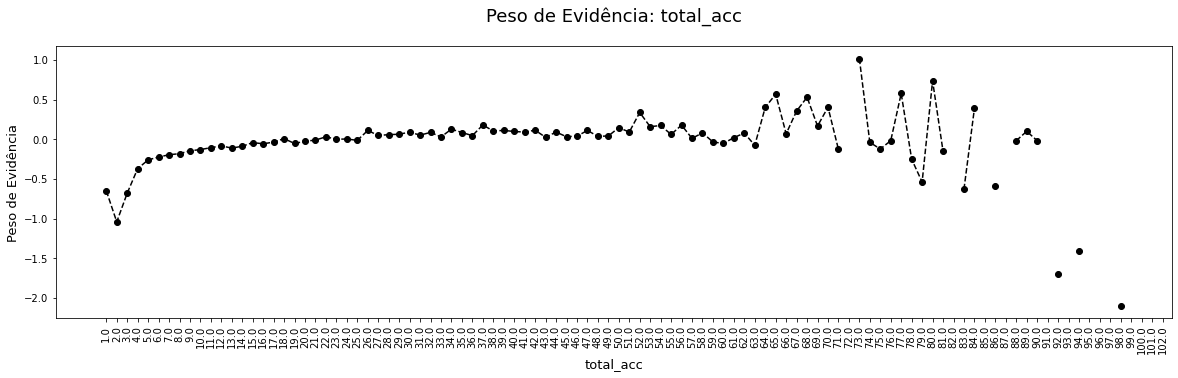

In [49]:
plot_woe(df_temp, 90)

In [50]:
df_inputs['total_acc:<=27']  = np.where((df_inputs['total_acc'] <= 27), 1, 0)
df_inputs['total_acc:28-51'] = np.where((df_inputs['total_acc'] >= 28) & (df_inputs['total_acc'] <= 51), 1, 0)
df_inputs['total_acc:>=52']  = np.where((df_inputs['total_acc'] >= 52), 1, 0)

`acc_now_delinq`

In [51]:
df_temp = woe_continua(df_inputs, 'acc_now_delinq', df_targets)
df_temp

,acc_now_delinq,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,0.0,464524,0.890684,0.996285,413744.0,50780.0,0.996275,0.996370,-0.000096,NaN,NaN,inf
1,1.0,1623,0.893407,0.003481,1450.0,173.0,0.003492,0.003394,0.028187,0.002723,0.028282,inf
2,2.0,92,0.902174,0.000197,83.0,9.0,0.000200,0.000177,0.123776,0.008767,0.095589,inf
3,3.0,11,0.818182,0.000024,9.0,2.0,0.000022,0.000039,-0.593763,0.083992,0.717539,inf
4,4.0,4,1.000000,0.000009,4.0,0.0,0.000010,0.000000,inf,0.181818,inf,inf
5,5.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000020,-2.097840,0.500000,inf,inf


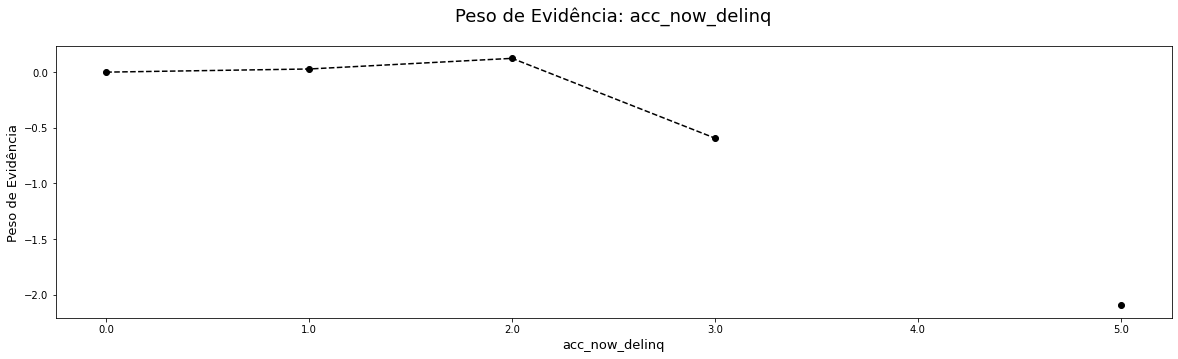

In [52]:
plot_woe(df_temp)

In [53]:
df_inputs['acc_now_delinq:0'] = np.where((df_inputs['acc_now_delinq'] == 0), 1, 0)
df_inputs['acc_now_delinq:>=1'] = np.where((df_inputs['acc_now_delinq'] >= 1), 1, 0)

`total_rev_hi_lim`

In [54]:
df_inputs['total_rev_hi_lim_factor'] = pd.cut(df_inputs['total_rev_hi_lim'], 50)

df_temp = woe_continua(df_inputs, 'total_rev_hi_lim_factor', df_targets)
df_temp

,total_rev_hi_lim_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-9999.999, 199999.98]",464870,0.890509,0.996965,413971.0,50899.0,0.996759,0.998646,-0.001891,NaN,NaN,inf
1,"(199999.98, 399999.96]",1264,0.950158,0.002711,1201.0,63.0,0.002892,0.001236,0.849931,0.059649,0.851822,inf
2,"(399999.96, 599999.94]",103,0.970874,0.000221,100.0,3.0,0.000241,0.000059,1.408714,0.020716,0.558783,inf
3,"(599999.94, 799999.92]",31,0.935484,0.000066,29.0,2.0,0.000070,0.000039,0.576305,0.035390,0.832409,inf
4,"(799999.92, 999999.9]",6,1.000000,0.000013,6.0,0.0,0.000014,0.000000,inf,0.064516,inf,inf
5,"(999999.9, 1199999.88]",5,1.000000,0.000011,5.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
6,"(1199999.88, 1399999.86]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
7,"(1399999.86, 1599999.84]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
8,"(1599999.84, 1799999.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(1799999.82, 1999999.8]",1,0.000000,0.000002,0.0,1.0,0.000000,0.000020,-inf,NaN,NaN,inf


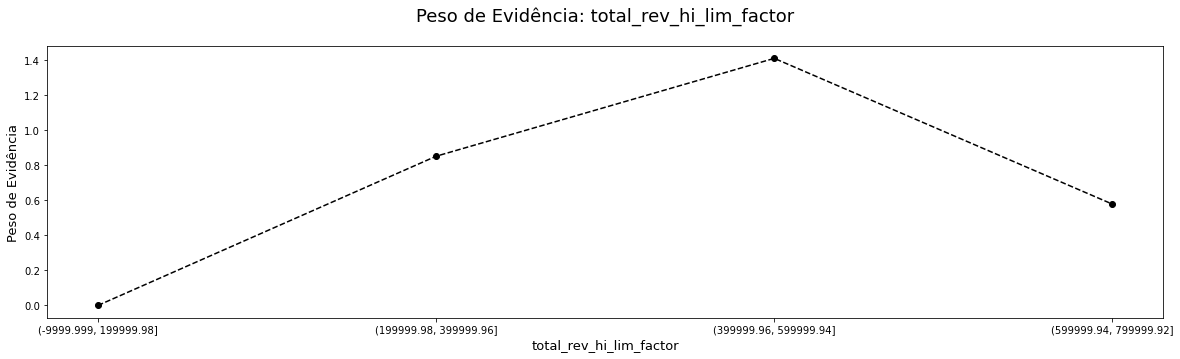

In [55]:
plot_woe(df_temp)

In [56]:
df_inputs['total_rev_hi_lim:<=5K'] = np.where((df_inputs['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs['total_rev_hi_lim:5K-10K'] = np.where((df_inputs['total_rev_hi_lim'] > 5000) & (df_inputs['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs['total_rev_hi_lim:10K-20K'] = np.where((df_inputs['total_rev_hi_lim'] > 10000) & (df_inputs['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs['total_rev_hi_lim:20K-30K'] = np.where((df_inputs['total_rev_hi_lim'] > 20000) & (df_inputs['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs['total_rev_hi_lim:30K-40K'] = np.where((df_inputs['total_rev_hi_lim'] > 30000) & (df_inputs['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs['total_rev_hi_lim:40K-55K'] = np.where((df_inputs['total_rev_hi_lim'] > 40000) & (df_inputs['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs['total_rev_hi_lim:55K-95K'] = np.where((df_inputs['total_rev_hi_lim'] > 55000) & (df_inputs['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs['total_rev_hi_lim:>95K'] = np.where((df_inputs['total_rev_hi_lim'] > 95000), 1, 0)

`installment`

In [57]:
df_inputs['installment_factor'] = pd.cut(df_inputs['installment'], 50)

df_temp = woe_continua(df_inputs, 'installment_factor', df_targets)
df_temp

,installment_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(14.276, 43.556]",2297,0.898999,0.004926,2065.0,232.0,0.004972,0.004552,0.088304,NaN,NaN,0.013297
1,"(43.556, 71.443]",6090,0.898851,0.013061,5474.0,616.0,0.013180,0.012086,0.086674,0.000148,0.001630,0.013297
2,"(71.443, 99.329]",8554,0.893617,0.018345,7644.0,910.0,0.018405,0.017854,0.030388,0.005234,0.056286,0.013297
3,"(99.329, 127.216]",11440,0.891434,0.024534,10198.0,1242.0,0.024555,0.024368,0.007625,0.002183,0.022763,0.013297
4,"(127.216, 155.102]",12648,0.894450,0.027125,11313.0,1335.0,0.027239,0.026193,0.039177,0.003016,0.031553,0.013297
5,"(155.102, 182.988]",20953,0.894908,0.044936,18751.0,2202.0,0.045149,0.043204,0.044037,0.000458,0.004860,0.013297
6,"(182.988, 210.875]",21342,0.904836,0.045770,19311.0,2031.0,0.046497,0.039849,0.154302,0.009928,0.110266,0.013297
7,"(210.875, 238.761]",18804,0.900606,0.040327,16935.0,1869.0,0.040776,0.036670,0.106135,0.004229,0.048168,0.013297
8,"(238.761, 266.648]",23532,0.901028,0.050467,21203.0,2329.0,0.051053,0.045695,0.110860,0.000422,0.004725,0.013297
9,"(266.648, 294.534]",25075,0.890728,0.053776,22335.0,2740.0,0.053778,0.053759,0.000353,0.010301,0.110507,0.013297


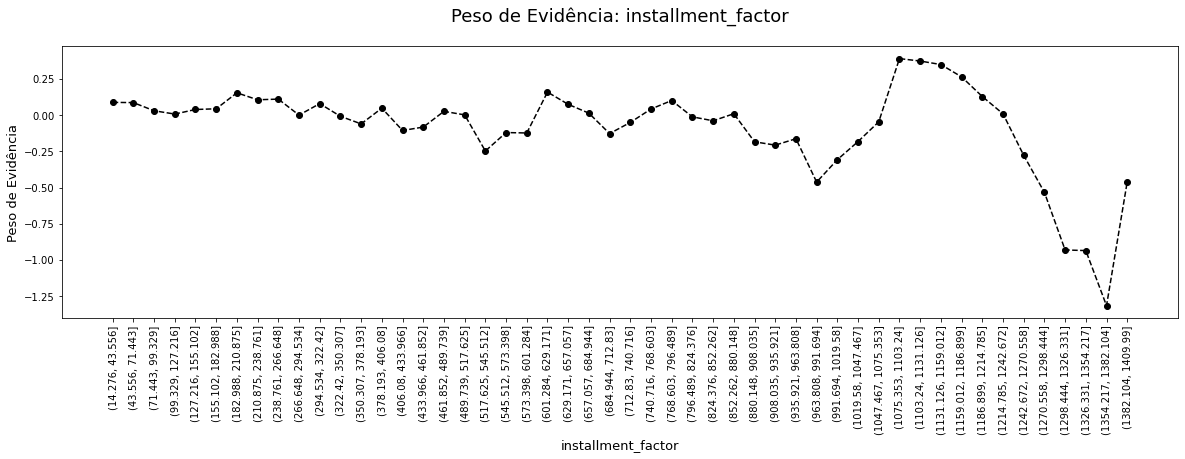

In [58]:
plot_woe(df_temp, 90)

`annual_inc`

In [59]:
df_inputs_prepr_temp = df_inputs.loc[df_inputs['annual_inc'] <= 140000, : ]
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

df_temp = woe_continua(df_inputs_prepr_temp, 'annual_inc_factor', df_targets[df_inputs_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000034,12.0,3.0,0.000031,0.000061,-0.689169,NaN,NaN,0.049225
1,"(4658.08, 7420.16]",46,0.782609,0.000105,36.0,10.0,0.000092,0.000204,-0.794529,0.017391,0.105361,0.049225
2,"(7420.16, 10182.24]",371,0.857143,0.000846,318.0,53.0,0.000816,0.001083,-0.283704,0.074534,0.510826,0.049225
3,"(10182.24, 12944.32]",675,0.816296,0.001538,551.0,124.0,0.001413,0.002535,-0.584010,0.040847,0.300306,0.049225
4,"(12944.32, 15706.4]",1517,0.834542,0.003458,1266.0,251.0,0.003248,0.005131,-0.457298,0.018246,0.126711,0.049225
5,"(15706.4, 18468.48]",1909,0.844421,0.004351,1612.0,297.0,0.004135,0.006071,-0.383964,0.009879,0.073334,0.049225
6,"(18468.48, 21230.56]",3678,0.851550,0.008383,3132.0,546.0,0.008034,0.011160,-0.328655,0.007129,0.055309,0.049225
7,"(21230.56, 23992.64]",3200,0.845625,0.007293,2706.0,494.0,0.006941,0.010098,-0.374772,0.005925,0.046117,0.049225
8,"(23992.64, 26754.72]",8833,0.851240,0.020132,7519.0,1314.0,0.019288,0.026859,-0.331106,0.005615,0.043666,0.049225
9,"(26754.72, 29516.8]",7008,0.856450,0.015973,6002.0,1006.0,0.015396,0.020563,-0.289352,0.005210,0.041753,0.049225


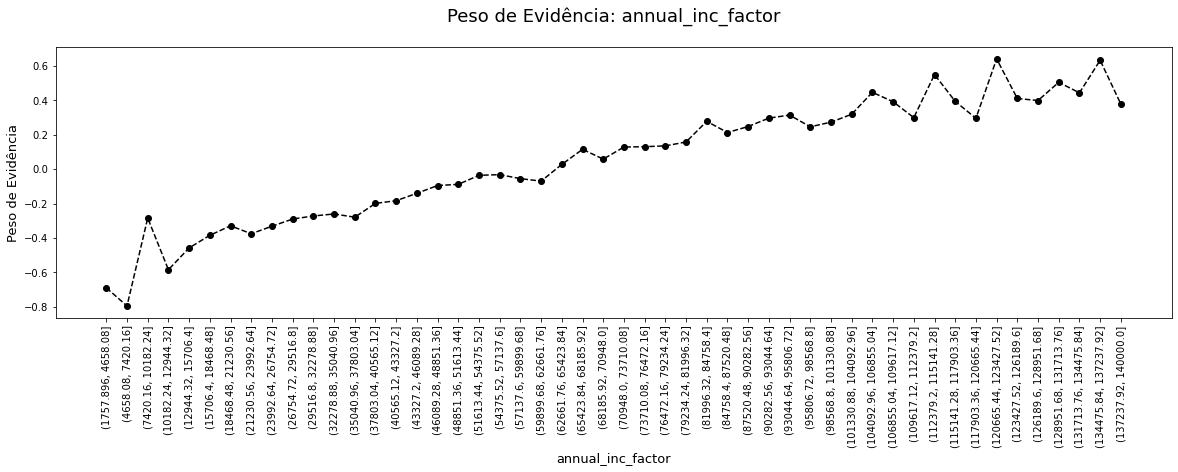

In [60]:
plot_woe(df_temp, 90)

In [61]:
df_inputs['annual_inc:<20K'] = np.where((df_inputs['annual_inc'] <= 20000), 1, 0)
df_inputs['annual_inc:20K-30K'] = np.where((df_inputs['annual_inc'] > 20000) & (df_inputs['annual_inc'] <= 30000), 1, 0)
df_inputs['annual_inc:30K-40K'] = np.where((df_inputs['annual_inc'] > 30000) & (df_inputs['annual_inc'] <= 40000), 1, 0)
df_inputs['annual_inc:40K-50K'] = np.where((df_inputs['annual_inc'] > 40000) & (df_inputs['annual_inc'] <= 50000), 1, 0)
df_inputs['annual_inc:50K-60K'] = np.where((df_inputs['annual_inc'] > 50000) & (df_inputs['annual_inc'] <= 60000), 1, 0)
df_inputs['annual_inc:60K-70K'] = np.where((df_inputs['annual_inc'] > 60000) & (df_inputs['annual_inc'] <= 70000), 1, 0)
df_inputs['annual_inc:70K-80K'] = np.where((df_inputs['annual_inc'] > 70000) & (df_inputs['annual_inc'] <= 80000), 1, 0)
df_inputs['annual_inc:80K-90K'] = np.where((df_inputs['annual_inc'] > 80000) & (df_inputs['annual_inc'] <= 90000), 1, 0)
df_inputs['annual_inc:90K-100K'] = np.where((df_inputs['annual_inc'] > 90000) & (df_inputs['annual_inc'] <= 100000), 1, 0)
df_inputs['annual_inc:100K-120K'] = np.where((df_inputs['annual_inc'] > 100000) & (df_inputs['annual_inc'] <= 120000), 1, 0)
df_inputs['annual_inc:120K-140K'] = np.where((df_inputs['annual_inc'] > 120000) & (df_inputs['annual_inc'] <= 140000), 1, 0)
df_inputs['annual_inc:>140K'] = np.where((df_inputs['annual_inc'] > 140000), 1, 0)

`mths_since_last_delinq`

In [62]:
df_inputs['mths_since_last_delinq_factor'] = pd.cut(df_inputs['mths_since_last_delinq'], 50)

df_temp = woe_continua(df_inputs, 'mths_since_last_delinq_factor', df_targets[df_inputs.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-0.188, 3.76]",6625,0.870943,0.030681,5770.0,855.0,0.029951,0.036720,-0.203783,NaN,NaN,inf
1,"(3.76, 7.52]",13834,0.886801,0.064066,12268.0,1566.0,0.063680,0.067256,-0.054639,0.015857,0.149144,inf
2,"(7.52, 11.28]",16690,0.892331,0.077292,14893.0,1797.0,0.077306,0.077177,0.001664,0.005530,0.056303,inf
3,"(11.28, 15.04]",16547,0.888076,0.076630,14695.0,1852.0,0.076278,0.079540,-0.041867,0.004254,0.043532,inf
4,"(15.04, 18.8]",11645,0.894805,0.053929,10420.0,1225.0,0.054088,0.052611,0.027678,0.006728,0.069545,inf
5,"(18.8, 22.56]",14579,0.892997,0.067516,13019.0,1560.0,0.067579,0.066999,0.008615,0.001808,0.019062,inf
6,"(22.56, 26.32]",13603,0.896052,0.062996,12189.0,1414.0,0.063270,0.060728,0.041003,0.003056,0.032387,inf
7,"(26.32, 30.08]",13221,0.895318,0.061227,11837.0,1384.0,0.061443,0.059440,0.033144,0.000734,0.007859,inf
8,"(30.08, 33.84]",9442,0.899492,0.043726,8493.0,949.0,0.044085,0.040758,0.078480,0.004174,0.045336,inf
9,"(33.84, 37.6]",12168,0.898669,0.056351,10935.0,1233.0,0.056761,0.052955,0.069410,0.000823,0.009070,inf


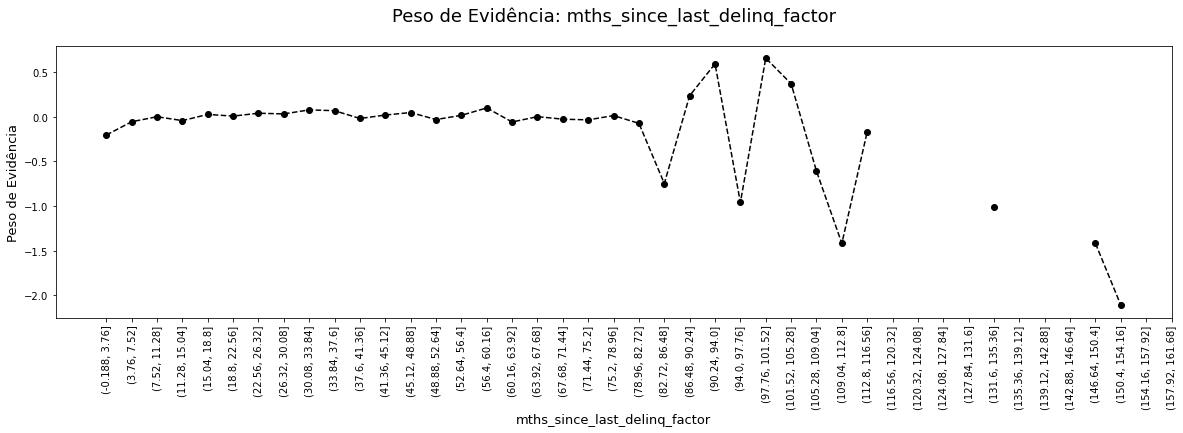

In [63]:
plot_woe(df_temp, 90)

In [64]:
df_inputs['mths_since_last_delinq:Missing'] = np.where((df_inputs['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs['mths_since_last_delinq:0-3'] = np.where((df_inputs['mths_since_last_delinq'] >= 0) & (df_inputs['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs['mths_since_last_delinq:4-30'] = np.where((df_inputs['mths_since_last_delinq'] >= 4) & (df_inputs['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs['mths_since_last_delinq:31-56'] = np.where((df_inputs['mths_since_last_delinq'] >= 31) & (df_inputs['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs['mths_since_last_delinq:>=57'] = np.where((df_inputs['mths_since_last_delinq'] >= 57), 1, 0)

`dti`

In [65]:
df_inputs['dti_factor'] = pd.cut(df_inputs['dti'], 50)

df_temp = woe_continua(df_inputs, 'dti_factor', df_targets)
df_temp

,dti_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-0.04, 0.8]",1924,0.896570,0.004126,1725.0,199.0,0.004153,0.003904,0.061833,NaN,NaN,0.027154
1,"(0.8, 1.6]",2443,0.897257,0.005239,2192.0,251.0,0.005278,0.004925,0.069273,0.000688,0.007439,0.027154
2,"(1.6, 2.399]",3148,0.908831,0.006751,2861.0,287.0,0.006889,0.005631,0.201600,0.011574,0.132328,0.027154
3,"(2.399, 3.199]",4042,0.910440,0.008669,3680.0,362.0,0.008861,0.007102,0.221180,0.001609,0.019580,0.027154
4,"(3.199, 3.999]",5171,0.909689,0.011090,4704.0,467.0,0.011326,0.009163,0.211995,0.000752,0.009185,0.027154
5,"(3.999, 4.799]",6297,0.916309,0.013505,5770.0,527.0,0.013893,0.010340,0.295383,0.006621,0.083388,0.027154
6,"(4.799, 5.599]",7516,0.911921,0.016119,6854.0,662.0,0.016503,0.012989,0.239478,0.004388,0.055905,0.027154
7,"(5.599, 6.398]",8511,0.912936,0.018253,7770.0,741.0,0.018709,0.014539,0.252181,0.001015,0.012703,0.027154
8,"(6.398, 7.198]",9664,0.914735,0.020726,8840.0,824.0,0.021285,0.016167,0.275028,0.001799,0.022847,0.027154
9,"(7.198, 7.998]",10974,0.914161,0.023535,10032.0,942.0,0.024155,0.018482,0.267686,0.000574,0.007342,0.027154


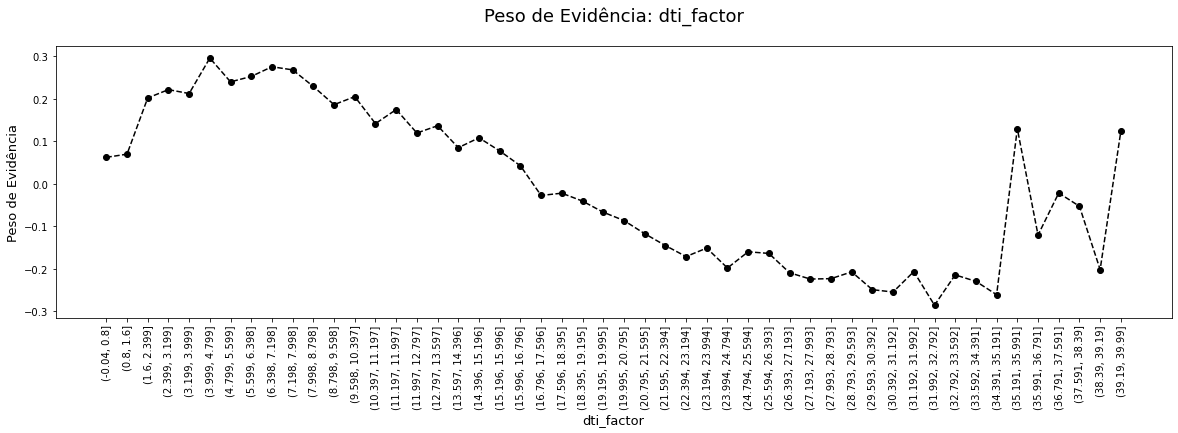

In [66]:
plot_woe(df_temp, 90)

In [67]:
df_inputs['dti:<=1.4'] = np.where((df_inputs['dti'] <= 1.4), 1, 0)
df_inputs['dti:1.4-3.5'] = np.where((df_inputs['dti'] > 1.4) & (df_inputs['dti'] <= 3.5), 1, 0)
df_inputs['dti:3.5-7.7'] = np.where((df_inputs['dti'] > 3.5) & (df_inputs['dti'] <= 7.7), 1, 0)
df_inputs['dti:7.7-10.5'] = np.where((df_inputs['dti'] > 7.7) & (df_inputs['dti'] <= 10.5), 1, 0)
df_inputs['dti:10.5-16.1'] = np.where((df_inputs['dti'] > 10.5) & (df_inputs['dti'] <= 16.1), 1, 0)
df_inputs['dti:16.1-20.3'] = np.where((df_inputs['dti'] > 16.1) & (df_inputs['dti'] <= 20.3), 1, 0)
df_inputs['dti:20.3-21.7'] = np.where((df_inputs['dti'] > 20.3) & (df_inputs['dti'] <= 21.7), 1, 0)
df_inputs['dti:21.7-22.4'] = np.where((df_inputs['dti'] > 21.7) & (df_inputs['dti'] <= 22.4), 1, 0)
df_inputs['dti:22.4-35'] = np.where((df_inputs['dti'] > 22.4) & (df_inputs['dti'] <= 35), 1, 0)
df_inputs['dti:>35'] = np.where((df_inputs['dti'] > 35), 1, 0)

`mths_since_last_record`

In [68]:
df_inputs_prepr_temp = df_inputs[pd.notnull(df_inputs['mths_since_last_record'])]
df_inputs['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

df_temp = woe_continua(df_inputs, 'mths_since_last_record_factor', df_targets)
df_temp

,mths_since_last_record_factor,n_obs,prop_bons,prop_n_obs,n_bons,n_ruins,prop_n_bons,prop_n_ruins,WoE,diff_prop_bons,diff_WoE,IV
0,"(-0.129, 2.58]",1330,0.760150,0.021233,1011.0,319.0,0.018059,0.047941,-0.976344,NaN,NaN,inf
1,"(2.58, 5.16]",156,0.897436,0.002491,140.0,16.0,0.002501,0.002405,0.039206,0.137286,1.015550,inf
2,"(5.16, 7.74]",158,0.917722,0.002522,145.0,13.0,0.002590,0.001954,0.281937,0.020286,0.242731,inf
3,"(7.74, 10.32]",306,0.915033,0.004885,280.0,26.0,0.005001,0.003907,0.246845,0.002689,0.035091,inf
4,"(10.32, 12.9]",250,0.892000,0.003991,223.0,27.0,0.003983,0.004058,-0.018513,0.023033,0.265358,inf
5,"(12.9, 15.48]",387,0.906977,0.006178,351.0,36.0,0.006270,0.005410,0.147420,0.014977,0.165932,inf
6,"(15.48, 18.06]",419,0.909308,0.006689,381.0,38.0,0.006806,0.005711,0.175365,0.002331,0.027946,inf
7,"(18.06, 20.64]",308,0.931818,0.004917,287.0,21.0,0.005126,0.003156,0.485112,0.022510,0.309747,inf
8,"(20.64, 23.22]",552,0.907609,0.008813,501.0,51.0,0.008949,0.007665,0.154933,0.024209,0.330179,inf
9,"(23.22, 25.8]",400,0.905000,0.006386,362.0,38.0,0.006466,0.005711,0.124210,0.002609,0.030722,inf


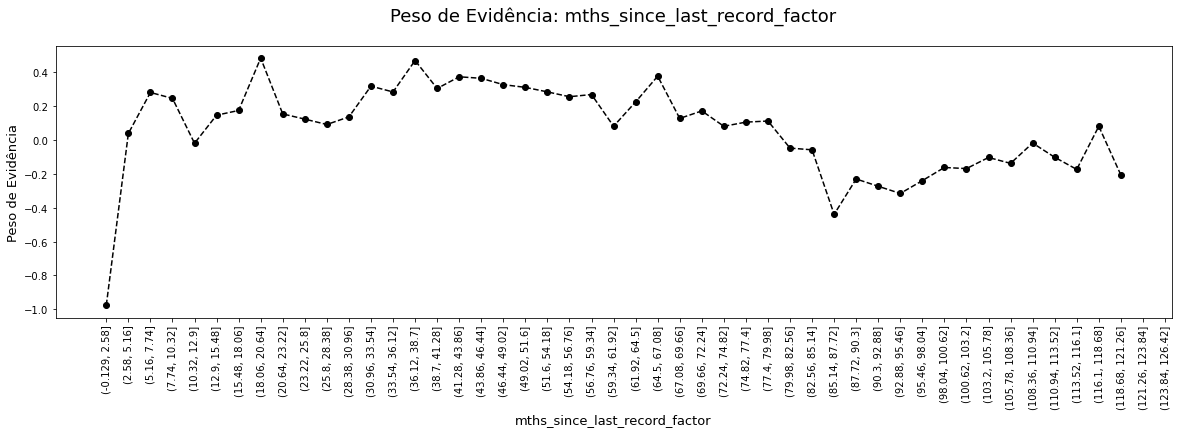

In [69]:
plot_woe(df_temp, 90)

In [70]:
df_inputs['mths_since_last_record:Missing'] = np.where((df_inputs['mths_since_last_record'].isnull()), 1, 0)
df_inputs['mths_since_last_record:0-2'] = np.where((df_inputs['mths_since_last_record'] >= 0) & (df_inputs['mths_since_last_record'] <= 2), 1, 0)
df_inputs['mths_since_last_record:3-20'] = np.where((df_inputs['mths_since_last_record'] >= 3) & (df_inputs['mths_since_last_record'] <= 20), 1, 0)
df_inputs['mths_since_last_record:21-31'] = np.where((df_inputs['mths_since_last_record'] >= 21) & (df_inputs['mths_since_last_record'] <= 31), 1, 0)
df_inputs['mths_since_last_record:32-80'] = np.where((df_inputs['mths_since_last_record'] >= 32) & (df_inputs['mths_since_last_record'] <= 80), 1, 0)
df_inputs['mths_since_last_record:81-86'] = np.where((df_inputs['mths_since_last_record'] >= 81) & (df_inputs['mths_since_last_record'] <= 86), 1, 0)
df_inputs['mths_since_last_record:>86'] = np.where((df_inputs['mths_since_last_record'] > 86), 1, 0)

----

## 4. Criação do dataset final

In [71]:
features_selected = df_inputs.loc[: , ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
                                       'home_ownership:RENT_OTHER_NONE_ANY','home_ownership:OWN','home_ownership:MORTGAGE',
                                       'addr_state:ND_NE_IA_NV_FL_HI_AL','addr_state:NM_VA','addr_state:NY','addr_state:OK_TN_MO_LA_MD_NC',
                                       'addr_state:CA','addr_state:UT_KY_AZ_NJ','addr_state:AR_MI_PA_OH_MN','addr_state:RI_MA_DE_SD_IN',
                                       'addr_state:GA_WA_OR','addr_state:WI_MT','addr_state:TX','addr_state:IL_CT','addr_state:KS_SC_CO_VT_AK_MS',
                                       'addr_state:WV_NH_WY_DC_ME_ID','verification_status:Not Verified','verification_status:Source Verified',
                                       'verification_status:Verified','purpose:educ__sm_b__wedd__ren_en__mov__house','purpose:credit_card',
                                       'purpose:debt_consolidation','purpose:oth__med__vacation','purpose:major_purch__car__home_impr','initial_list_status:f',
                                       'initial_list_status:w','term:36','term:60','emp_length:0','emp_length:1','emp_length:2-4','emp_length:5-6',
                                       'emp_length:7-9','emp_length:10','mths_since_issue_d:<38','mths_since_issue_d:38-39','mths_since_issue_d:40-41',
                                       'mths_since_issue_d:42-48','mths_since_issue_d:49-52','mths_since_issue_d:53-64','mths_since_issue_d:65-84',
                                       'mths_since_issue_d:>84','int_rate:<9.548','int_rate:9.548-12.025','int_rate:12.025-15.74',
                                       'int_rate:15.74-20.281','int_rate:>20.281','mths_since_earliest_cr_line:<140','mths_since_earliest_cr_line:141-164',
                                       'mths_since_earliest_cr_line:165-247','mths_since_earliest_cr_line:248-270','mths_since_earliest_cr_line:271-352',
                                       'mths_since_earliest_cr_line:>352','delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>=4',
                                       'inq_last_6mths:0','inq_last_6mths:1-2','inq_last_6mths:3-6','inq_last_6mths:>6','open_acc:0',
                                       'open_acc:1-3','open_acc:4-12','open_acc:13-17','open_acc:18-22','open_acc:23-25','open_acc:26-30',
                                       'open_acc:>=31','pub_rec:0-2','pub_rec:3-4','pub_rec:>=5','total_acc:<=27','total_acc:28-51',
                                       'total_acc:>=52','acc_now_delinq:0','acc_now_delinq:>=1','total_rev_hi_lim:<=5K','total_rev_hi_lim:5K-10K',
                                       'total_rev_hi_lim:10K-20K','total_rev_hi_lim:20K-30K','total_rev_hi_lim:30K-40K','total_rev_hi_lim:40K-55K',
                                       'total_rev_hi_lim:55K-95K','total_rev_hi_lim:>95K','annual_inc:<20K','annual_inc:20K-30K',
                                       'annual_inc:30K-40K','annual_inc:40K-50K','annual_inc:50K-60K','annual_inc:60K-70K',
                                       'annual_inc:70K-80K','annual_inc:80K-90K','annual_inc:90K-100K','annual_inc:100K-120K',
                                       'annual_inc:120K-140K','annual_inc:>140K','dti:<=1.4','dti:1.4-3.5','dti:3.5-7.7','dti:7.7-10.5',
                                       'dti:10.5-16.1','dti:16.1-20.3','dti:20.3-21.7','dti:21.7-22.4','dti:22.4-35','dti:>35',
                                       'mths_since_last_delinq:Missing','mths_since_last_delinq:0-3','mths_since_last_delinq:4-30',
                                       'mths_since_last_delinq:31-56','mths_since_last_delinq:>=57','mths_since_last_record:Missing',
                                       'mths_since_last_record:0-2','mths_since_last_record:3-20','mths_since_last_record:21-31',
                                       'mths_since_last_record:32-80','mths_since_last_record:81-86','mths_since_last_record:>86',]]

features_selected['target'] = df_targets

Retirando uma categoria criada de cada variável para evitar multicolinearidade.

In [72]:
ref_categorias = ['grade:G','home_ownership:RENT_OTHER_NONE_ANY','addr_state:ND_NE_IA_NV_FL_HI_AL',
                  'verification_status:Verified','purpose:educ__sm_b__wedd__ren_en__mov__house',
                  'initial_list_status:f','term:60','emp_length:0','mths_since_issue_d:>84',
                  'int_rate:>20.281','mths_since_earliest_cr_line:<140','delinq_2yrs:>=4',
                  'inq_last_6mths:>6','open_acc:0','pub_rec:0-2','total_acc:<=27','acc_now_delinq:0',
                  'total_rev_hi_lim:<=5K','annual_inc:<20K','dti:>35','mths_since_last_delinq:0-3',
                  'mths_since_last_record:0-2']

features_selected = features_selected.drop(ref_categorias, axis = 1)

In [73]:
# salvando os dados

features_selected.to_csv('dados/selected_data.csv', index = False)

---